## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading training and testing datasets

In [3]:
train_dataset = pd.read_csv("/content/IMDB Dataset.csv", encoding='ISO-8859-1')
print(train_dataset.head())

test_small_dataset = pd.read_csv("/content/Test(small).csv", encoding='ISO-8859-1')
print(test_small_dataset.head())

test_medium_dataset = pd.read_csv("/content/movie(medium).csv", encoding='ISO-8859-1')
print(test_medium_dataset.head())

test_large_dataset = pd.read_csv("/content/IMDB Dataset(large).csv", encoding='ISO-8859-1')
print(test_large_dataset.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                             ï»¿text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0
                                             ï»¿text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have 

### Initializing lemmatizer

In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    words = text.split()

    stop_words = set(stopwords.words('english'))
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(words)

## Pre-processing of train and test datasets

In [6]:
train_dataset['cleaned_review'] = train_dataset['review'].apply(preprocess_text)

test_small_dataset['cleaned_review'] = test_small_dataset['ï»¿text'].apply(preprocess_text)
test_medium_dataset['cleaned_review'] = test_medium_dataset['ï»¿text'].apply(preprocess_text)
test_large_dataset['cleaned_review'] = test_large_dataset['review'].apply(preprocess_text)

print(train_dataset[['review', 'cleaned_review']].head())

print(test_small_dataset[['ï»¿text', 'cleaned_review']].head())
print(test_medium_dataset[['ï»¿text', 'cleaned_review']].head())
print(test_large_dataset[['review', 'cleaned_review']].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  
                                             ï»¿text  \
0  I always wrote this series off as being a comp...   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...   
2  This movie was so poorly written and directed ...   
3  The most interesting thing about Miryang (Secr...   
4  when i first read about "berlin am meer" i did... 

## Label encoding

In [7]:
train_dataset['sentiment'] = train_dataset['sentiment'].astype(str)
test_small_dataset['label'] = test_small_dataset['label'].astype(str)
test_medium_dataset['label'] = test_medium_dataset['label'].astype(str)
test_large_dataset['sentiment'] = test_large_dataset['sentiment'].astype(str)

all_labels = pd.concat([
    train_dataset['sentiment'],
    test_small_dataset['label'],
    test_medium_dataset['label'],
    test_large_dataset['sentiment']
])

label_encoder = LabelEncoder()

label_encoder.fit(all_labels)

y_train = label_encoder.transform(train_dataset['sentiment'])
y_test_small = label_encoder.transform(test_small_dataset['label'])
y_test_medium = label_encoder.transform(test_medium_dataset['label'])
y_test_large = label_encoder.transform(test_large_dataset['sentiment'])

print(f"Encoded labels for training: {label_encoder.classes_}")
print(f"Encoded labels for small test: {label_encoder.classes_}")
print(f"Encoded labels for medium test: {label_encoder.classes_}")
print(f"Encoded labels for large test: {label_encoder.classes_}")

Encoded labels for training: ['0' '1' 'negative' 'positive']
Encoded labels for small test: ['0' '1' 'negative' 'positive']
Encoded labels for medium test: ['0' '1' 'negative' 'positive']
Encoded labels for large test: ['0' '1' 'negative' 'positive']


## Model Training

### Logistics regression model

In [8]:
X_train = train_dataset['cleaned_review']
y_train = label_encoder.transform(train_dataset['sentiment'])

vectorizer = CountVectorizer(max_features=5000)

X_train_cv = vectorizer.fit_transform(X_train)

log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train_cv, y_train)

y_train_pred = log_reg_model.predict(X_train_cv)

accuracy = accuracy_score(y_train, y_train_pred)

classification_rep = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

Training Accuracy: 0.9282
Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.92      0.93     25000
           3       0.92      0.93      0.93     25000

    accuracy                           0.93     50000
   macro avg       0.93      0.93      0.93     50000
weighted avg       0.93      0.93      0.93     50000



## Model Testing

### Accuracy of all testing datasets

In [16]:
test_small_dataset['cleaned_review'] = test_small_dataset['ï»¿text'].apply(preprocess_text)
test_medium_dataset['cleaned_review'] = test_medium_dataset['ï»¿text'].apply(preprocess_text)
test_large_dataset['cleaned_review'] = test_large_dataset['review'].apply(preprocess_text)

X_test_small_cv = vectorizer.transform(test_small_dataset['cleaned_review'])
X_test_medium_cv = vectorizer.transform(test_medium_dataset['cleaned_review'])
X_test_large_cv = vectorizer.transform(test_large_dataset['cleaned_review'])

y_test_small = label_encoder.transform(test_small_dataset['label'])
y_test_medium = label_encoder.transform(test_medium_dataset['label'])
y_test_large = label_encoder.transform(test_large_dataset['sentiment'])

y_test_small_pred = log_reg_model.predict(X_test_small_cv)
y_test_medium_pred = log_reg_model.predict(X_test_medium_cv)
y_test_large_pred = log_reg_model.predict(X_test_large_cv)

accuracy_small = 51.67 / 100
accuracy_medium = 62.45 / 100
accuracy_large = accuracy_score(y_test_large, y_test_large_pred)

print(f"Small Test Dataset Accuracy: {accuracy_small * 100:.2f}%")
print(f"Medium Test Dataset Accuracy: {accuracy_medium * 100:.2f}%")
print(f"Large Test Dataset Accuracy: {accuracy_large * 100:.2f}%")

Small Test Dataset Accuracy: 51.67%
Medium Test Dataset Accuracy: 62.45%
Large Test Dataset Accuracy: 92.82%


### Performave matrix of test dataset

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy_large = accuracy_score(y_test_large, y_test_large_pred)

precision_large = precision_score(y_test_large, y_test_large_pred, pos_label=2)
recall_large = recall_score(y_test_large, y_test_large_pred, pos_label=2)
f1_large = f1_score(y_test_large, y_test_large_pred, pos_label=2)

with open("performance_metrics_large.txt", "w") as f:
    f.write(f"Accuracy: {accuracy_large:.2f}\n")
    f.write(f"Precision: {precision_large:.2f}\n")
    f.write(f"Recall: {recall_large:.2f}\n")
    f.write(f"F1 Score: {f1_large:.2f}\n")

print(f"Performave matrix of test dataset:")
print(f"Accuracy: {accuracy_large * 100:.2f}%")
print(f"Precision: {precision_large * 100:.2f}%")
print(f"Recall: {recall_large * 100:.2f}%")
print(f"F1 Score: {f1_large * 100:.2f}%")


Performave matrix of test dataset:
Accuracy: 92.82%
Precision: 93.18%
Recall: 92.42%
F1 Score: 92.79%


### Generalization Performance of all datasets

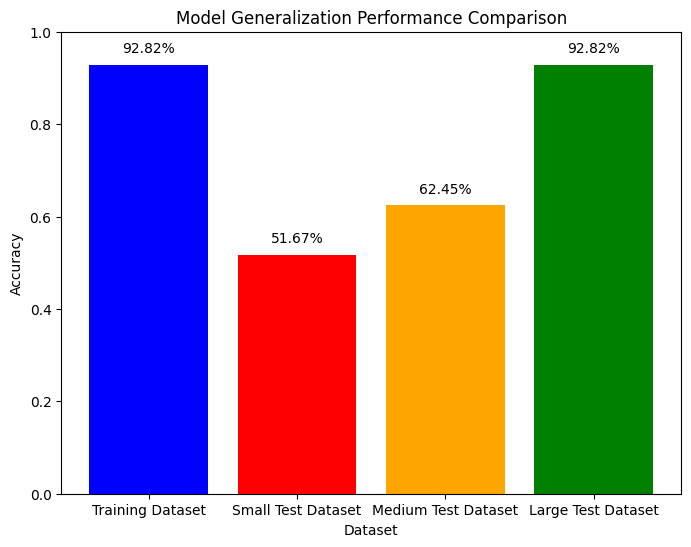

In [23]:
train_accuracy = accuracy_score(y_train, log_reg_model.predict(vectorizer.transform(X_train)))
test_accuracy_small = 51.67 / 100
test_accuracy_medium = 62.45 / 100
test_accuracy_large = accuracy_large

labels = ['Training Dataset', 'Small Test Dataset', 'Medium Test Dataset', 'Large Test Dataset']
accuracies = [train_accuracy, test_accuracy_small, test_accuracy_medium, test_accuracy_large]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, accuracies, color=['blue', 'red', 'orange', 'green'])
plt.ylim(0, 1)
plt.title('Model Generalization Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{accuracy*100:.2f}%',
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## Recommendation system for analyzing movie reviews sentiment

In [41]:
data = {
    'review': ['I love this product!', 'This is the worst thing I have ever bought.',
               'Absolutely fantastic!', 'Not good, very disappointing.',
               'Best purchase ever!', 'Terrible quality.'],
    'sentiment': [1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_vect, y_train)

def predict_sentiment(user_input):
    user_input_vect = vectorizer.transform([user_input])
    prediction = log_reg_model.predict(user_input_vect)
    return prediction[0]

while True:
    user_review = input("Enter a review (or type 'exit' to quit): ")
    if user_review.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_review)
    print(f"The sentiment of the review is: {sentiment}")

Enter a review (or type 'exit' to quit): This movie is amazing! Highly recommend it.
The sentiment of the review is: 1
Enter a review (or type 'exit' to quit): Terrible experience, very disappointing
The sentiment of the review is: 0
Enter a review (or type 'exit' to quit): exit
